In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

def visualize_summary_features_with_categorical(file_path):
    try:
        df = pd.read_csv(file_path, on_bad_lines='warn')

        # Đổi tên cột cho chuẩn
        df = df.rename(columns={
            "Title": "Tên Sản Phẩm",
            "Price sale": "Giá Bán",
            "Loại card đồ họa": "GPU",
            "Dung lượng RAM": "RAM",
            "Ổ cứng": "Bộ Nhớ",
            "Kích thước màn hình": "Kích Thước",
            "Công nghệ màn hình": "Màn Hình",
            "Pin": "Dung Lượng Pin",
            "Hệ điều hành": "Hệ Điều Hành",
            "Loại CPU": "CPU",
            "Hãng Sản Xuất": "Hãng Sản Xuất"
        })

        # Các cột số cần thống kê
        numeric_columns = ["Giá Bán", "RAM", "Bộ Nhớ", "Kích Thước", "Dung Lượng Pin"]

        # Các cột nhãn cần lấy giá trị phổ biến nhất
        categorical_columns = [
            "GPU", "Hệ Điều Hành", "CPU", "Hãng Sản Xuất"
        ]

        # Hàm extract số từ chuỗi (ví dụ '14.990.000đ' -> 14990000)
        def extract_number(text):
            import re
            if pd.isna(text):
                return None
            match = re.findall(r'[\d,.]+', str(text).replace('.', '').replace(',', '.'))
            if match:
                try:
                    return float(match[0])
                except:
                    return None
            return None

        # Chuẩn bị DataFrame chứa kết quả
        summary = []

        # Xử lý cột số
        for col in numeric_columns:
            df[col + "_num"] = df[col].apply(extract_number)
            mean = round(df[col + "_num"].mean(skipna=True), 2)
            median = round(df[col + "_num"].median(skipna=True), 2)
            min_val = round(df[col + "_num"].min(skipna=True), 2)
            max_val = round(df[col + "_num"].max(skipna=True), 2)
            summary.append({
                "Đặc trưng": col,
                "Mean": mean,
                "Median": median,
                "Min": min_val,
                "Max": max_val,
                "Mode": "-",
                "Mode Frequency": "-"
            })

        # Xử lý cột nhãn
        for col in categorical_columns:
            mode_val = df[col].mode(dropna=True)
            if len(mode_val) > 0:
                mode_val = mode_val[0]
                freq = df[col].value_counts(normalize=True).get(mode_val, 0)
                freq_percent = f"{freq*100:.1f}%"
            else:
                mode_val = "-"
                freq_percent = "-"
            summary.append({
                "Đặc trưng": col,
                "Mean": "-",
                "Median": "-",
                "Min": "-",
                "Max": "-",
                "Mode": mode_val,
                "Mode Frequency": freq_percent
            })

        # Chuyển thành DataFrame
        summary_df = pd.DataFrame(summary)

        # Hàm wrap text để xuống dòng nếu quá dài
        def wrap_text(text, width=25):
            import textwrap
            return "\n".join(textwrap.wrap(str(text), width=width))

        for col in summary_df.columns:
            summary_df[col] = summary_df[col].apply(wrap_text)

        # Hiển thị bảng với matplotlib
        plt.figure(figsize=(18, len(summary_df)*0.8 + 3))  # Tăng chiều rộng figure
        ax = plt.gca()
        ax.axis('off')
  
        table = ax.table(
        cellText=summary_df.values,
        colLabels=summary_df.columns,
        cellLoc='center',
        loc='center',
        colColours=['#40466e']*summary_df.shape[1]
        )
        table.auto_set_font_size(False)
        table.set_fontsize(12)
        table.scale(1.5, 3)  # Tăng chiều rộng và chiều cao ô nhiều hơn

        plt.title("📊 Thống kê đặc trưng số và nhãn phổ biến nhất", fontsize=18, fontweight='bold')
        plt.show()

    except Exception as e:
        print("❌ Lỗi:", e)


c:\Users\toanm\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


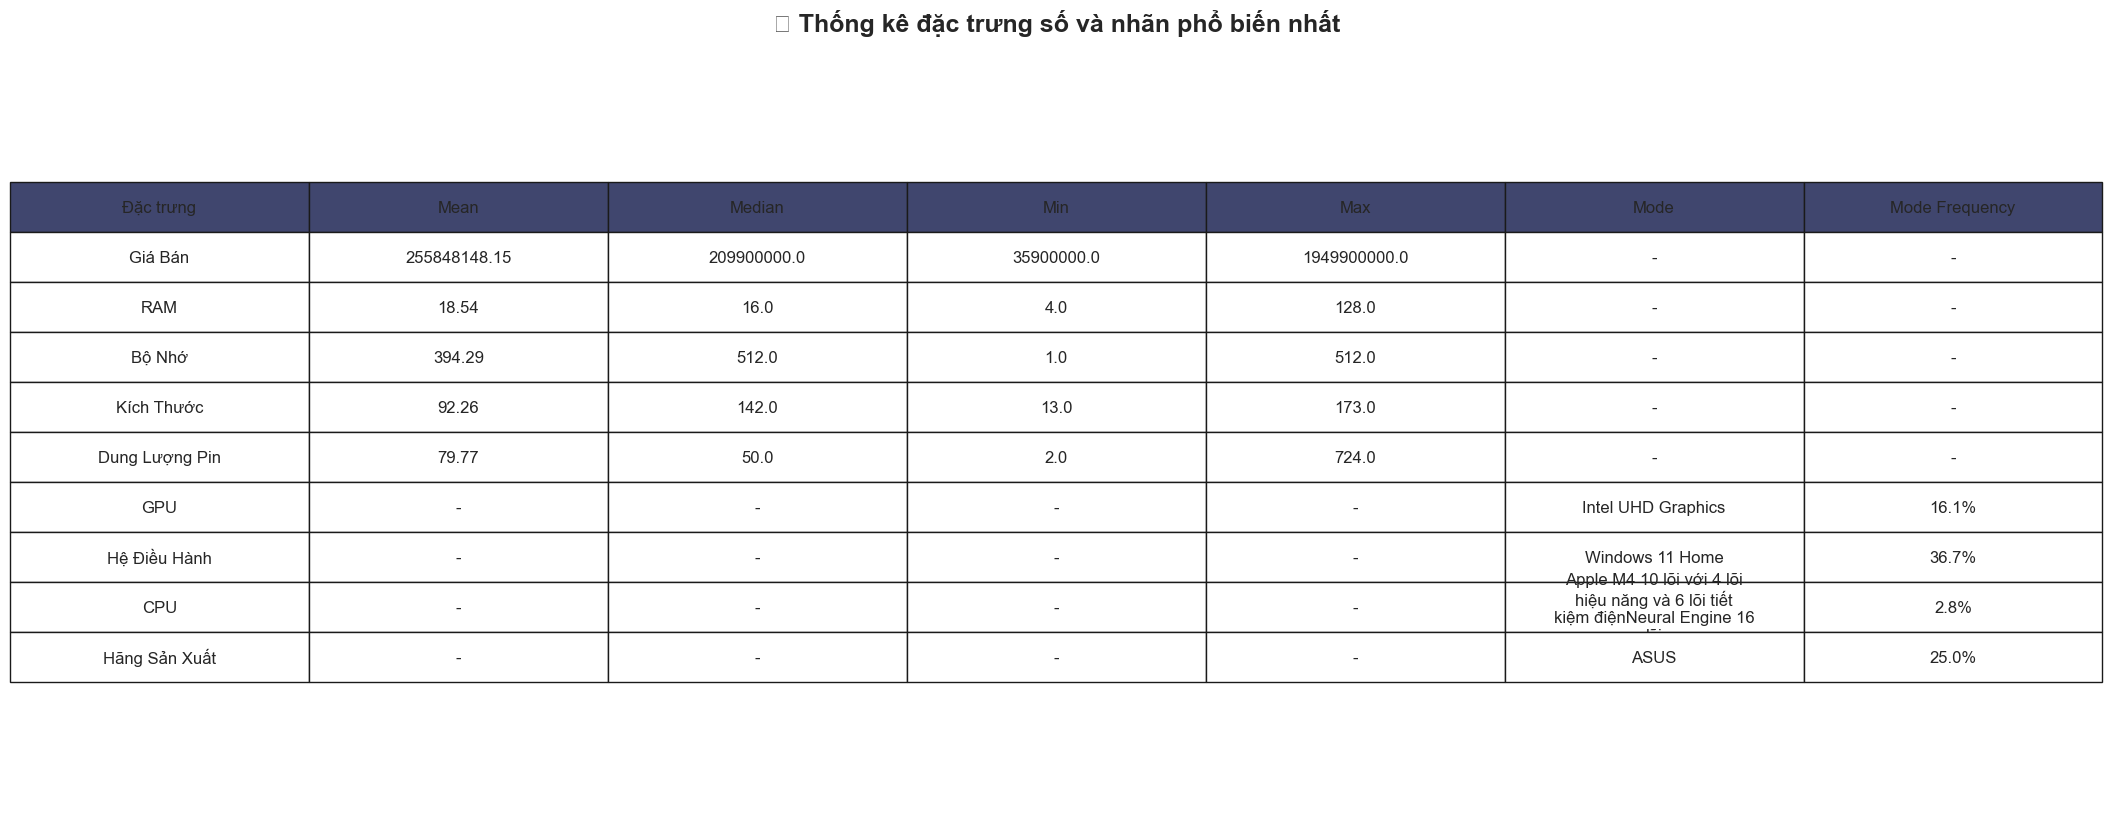

In [70]:
visualize_summary_features_with_categorical('D:\\KHDL\\Phân loại mục đích sử dụng và phân cụm laptop\\clean_data\\clean_data_train\\clean_cellphones.csv')

<>:33: SyntaxWarning: invalid escape sequence '\P'
<>:33: SyntaxWarning: invalid escape sequence '\P'
C:\Users\toanm\AppData\Local\Temp\ipykernel_14532\656565284.py:33: SyntaxWarning: invalid escape sequence '\P'
  compare_dataset_sizes('D:\\KHDL\\Phân loại mục đích sử dụng và phân cụm laptop\\feature_engineering\\data_train.csv', 'D:\\KHDL\Phân loại mục đích sử dụng và phân cụm laptop\\feature_engineering\\data_test_final.csv', label1='Tập huấn luyện', label2='Tập kiểm tra')
C:\Users\toanm\AppData\Local\Temp\ipykernel_14532\656565284.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Dataset', y='Số lượng mẫu', data=data, palette='pastel')
C:\Users\toanm\AppData\Local\Temp\ipykernel_14532\656565284.py:31: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\toanm\anaconda3\Lib\sit

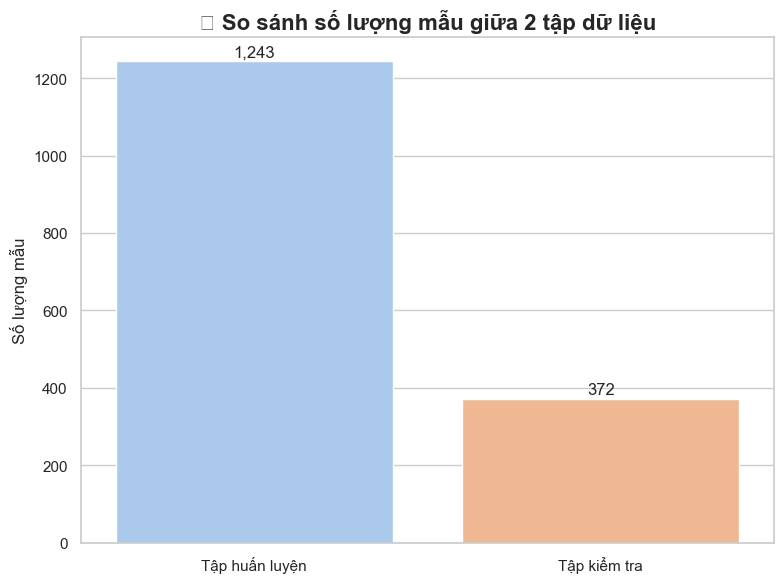

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

def compare_dataset_sizes(file_path1, file_path2, label1='Dataset 1', label2='Dataset 2'):
    import pandas as pd
    
    # Đọc 2 file csv
    df1 = pd.read_csv(file_path1, on_bad_lines='warn')
    df2 = pd.read_csv(file_path2, on_bad_lines='warn')
    
    size1 = len(df1)
    size2 = len(df2)
    
    # Chuẩn bị dữ liệu cho biểu đồ
    data = {
        'Dataset': [label1, label2],
        'Số lượng mẫu': [size1, size2]
    }
    
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(8,6))
    ax = sns.barplot(x='Dataset', y='Số lượng mẫu', data=data, palette='pastel')
    
    # Hiển thị số liệu trên cột
    for i, v in enumerate(data['Số lượng mẫu']):
        ax.text(i, v + max(data['Số lượng mẫu']) * 0.01, f"{v:,}", ha='center', fontsize=12)
    
    plt.title("📊 So sánh số lượng mẫu giữa 2 tập dữ liệu", fontsize=16, fontweight='bold')
    plt.ylabel("Số lượng mẫu")
    plt.xlabel("")
    plt.tight_layout()
    plt.show()
compare_dataset_sizes('D:\\KHDL\\Phân loại mục đích sử dụng và phân cụm laptop\\feature_engineering\\data_train.csv', 'D:\\KHDL\Phân loại mục đích sử dụng và phân cụm laptop\\feature_engineering\\data_test_final.csv', label1='Tập huấn luyện', label2='Tập kiểm tra')
